Let's review the important continuous distributions following the class notes at section 4.3:
- Uniform: $X$ with $f_X(x) = \frac{1}{b-a}$ on $[a, b]$ and 0 elsewhere
- Exponential: $X$ with $f_X(x) = \lambda e^{\lambda x}$ for positive $x$
- Gaussian: $X$ with $f_X(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

We will use the isolet spoken letter dataset.

"This data set was generated as follows.
 150 subjects spoke the name of each letter of the alphabet twice.
 Hence, we have 52 training examples from each speaker.
 The speakers are grouped into sets of 30 speakers each, and are
 referred to as isolet1, isolet2, isolet3, isolet4, and isolet5.
 The data appears in isolet1+2+3+4.data in sequential order, first
 the speakers from isolet1, then isolet2, and so on.  The test
 set, isolet5, is a separate file."


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

- Get the data from here https://archive.ics.uci.edu/ml/machine-learning-databases/isolet/
- unzip isolet1+2+3+4.data
- modify the path below:

In [4]:
PATH_DATA = '/Users/leventsagun/Downloads/'

In [7]:
isolet = pd.read_csv(PATH_DATA + 'isolet1+2+3+4.data', header=None)
isolet_features = isolet.drop(617, axis=1)
isolet_labels = isolet[617]

"The features include spectral coefficients; contour
 features, sonorant features, pre-sonorant features, and
 post-sonorant features.  Exact order of appearance of the
 features is not known."

In [53]:
isolet_features[:1]

,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
0,-0.4394,-0.093,0.1718,0.462,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.231,...,0.3334,0.4102,0.2052,0.3846,0.359,0.5898,0.3334,0.641,0.5898,-0.4872


# 1. Uniform 
We know that there are equal number of samples per letter. Therefore, the distribution of the labels must be uniform between 1 and 26.

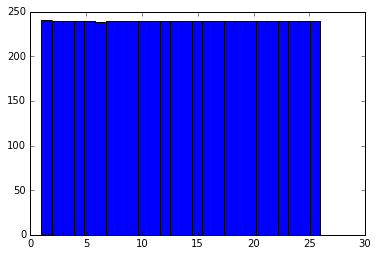

In [21]:
plt.hist(isolet_labels, 26)
plt.show()

In [22]:
def plot_uniform(num_bins):
    plt.hist(isolet_labels, num_bins)
    plt.show()

**Questions**
1. Explain why you see apparently non-uniform histograms when you change the bin size.
2. Explain why this is a little cheating and doesn't represent the first distribution at the top of the page. 

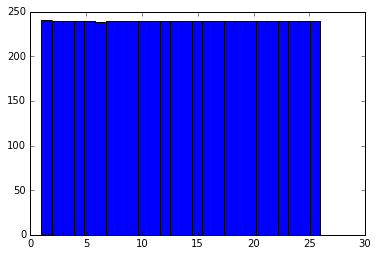

In [25]:
interact(plot_uniform, num_bins=(1,52,1));

# 2. Exponential

# 3. Gaussian
Look at the norms of each row:

15.6665118301 0.577099262971


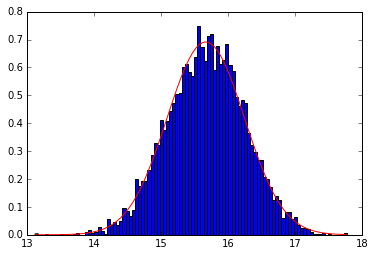

In [106]:
norms = []
for i in isolet_features.index:
    norms.append(np.linalg.norm(isolet_features.iloc[i]))
    
plt.hist(norms, 100, normed=True)
mu, sigma = np.mean(norms), np.std(norms)
print mu, sigma
x = np.linspace(min(norms), max(norms), 100)
y = (1/((np.sqrt(2*np.pi)*sigma)))*np.exp(-((x-mu)**2)/(2*sigma**2))
plt.plot(x, y, 'r')
plt.show()

In [135]:
# we can generate continuous uniform random variable using the norms above and transforming it